In [1]:
%pwd

'/home/ruskirin/Documents/Projects/lin-que-dropping'

In [2]:
import os
import regex
import yaml
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path

In [3]:
path_win_down = Path('/home/../../mnt/c/Users/ruski/Downloads')
path_proj_dir = Path('/home/ruskirin/Documents/Projects/lin-que-dropping')

In [4]:
os.listdir(path_win_down)

['1165-delaware-rent-202201.pdf',
 'Boxcryptor_v2.49.1965_Setup.msi',
 'desktop.ini',
 'verbs-epistemic',
 'verbs-stative',
 'verbs-volitional']

In [5]:
with open(path_proj_dir/'main-conf.yml') as f:
    try:
        conf = yaml.safe_load(f)
    except Exception as e:
        print(e.args)

In [6]:
import numpy as np
import pandas as pd

In [7]:
name = lambda x: f'*{x}/*conj*/2021-11-07-extraction/*.xlsx'

In [8]:
files_e = [f for f in path_win_down.glob(name('epistemic'))]
files_v = [f for f in path_win_down.glob(name('volitional'))]
files_s = [f for f in path_win_down.glob(name('stative'))]

In [9]:
print(len(files_e), len(files_v), len(files_s))

19 10 21


In [10]:
def save_readme(location, text, append=True):
    op = 'a+' if append else 'w'
    
    with open(location/'README.txt', op) as readme:
        readme.seek(0)
        
        if append and (len(readme.read(100)) > 0):
             text = '\n\n' + text
        
        readme.write(text)

In [11]:
def make_date_dir(
    path: Path,
    description,
    date: datetime = datetime.now().strftime(conf['date_format'])):
    """
    path: where to create directory
    date: (optional) specify datetime for folder name; defaults to time at runtime
    description: description of folder, included as README.txt
    
    return: created directory path
    """
    
    save_path = path/date
    
    try:
        save_path.mkdir(parents=True)
    except FileNotFoundError as fne:
        print(f'Path specified does not exist:\n{fne.args}')
    except Exception as e:
        print(e.args)
        
    save_readme(save_path, description, append=False)
    
    return save_path

In [12]:
def save_test_sample(name, location: Path, *files):
    """
    name: identifier for files (used in name-scheme of saved file)
    location: path to save directory
    
    return: randomized sample taken from all the tokens found in files
    """
    name_scheme = f'{name}-testing.csv'
    file_type = regex.search(r'\.(?<type>\w+)$', str(files[0]))['type']
    
    if file_type=='xlsx':
        data = pd.concat([pd.read_excel(f, dtype=conf['col_types']) for f in files], 
                         ignore_index=True)
    elif file_type=='csv':
        data = pd.concat([pd.read_csv(f, sep='~', dtype=conf['col_types']) for f in files], 
                         ignore_index=True)
    
    save_idx = np.random.choice(data.shape[0], int(data.shape[0]/20), replace=False)
    print(f'Creating testing sample ({name_scheme}) of length ({len(save_idx)})')
    
    sample = data.iloc[save_idx]
    sample.to_csv(location/name_scheme, sep='~', index=False)
    
    return sample

In [13]:
def save_csv(df, name, location):
    """
    General method for saving any dataframe/series
    
    name: filename to save as
    location: directory to save dataframe/series in
    """
    
    name_scheme = name+'.csv' if '.csv' not in name else name
    df.to_csv(location/name_scheme, sep='~', index=False)

In [14]:
do = False

if do:
    sd = '12/30: After the 12/6 meeting where decided on specific formatting of normd text '\
         '(lower case except for VOI). Will also be adding column for a hyperlink to the online '\
         'displaCy displayer'
    sp = make_date_dir(path_proj_dir/'saves'/'samples-for-testing', sd)
    
    test_sample_e = save_test_sample('epistemic', sp, *files_e)
    test_sample_v = save_test_sample('volitional', sp, *files_v)
    test_sample_s = save_test_sample('stative', sp, *files_s)

In [15]:
work_sample_v = pd.read_excel(files_v[np.random.randint(0, len(files_v)-1)])
work_sample_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   verbs               7058 non-null   object 
 1   text_orig           7058 non-null   object 
 2   dependencies        7058 non-null   object 
 3   has_ccomp           7058 non-null   bool   
 4   has_que             7058 non-null   bool   
 5   text_norm           7058 non-null   object 
 6   lemma_pos_stopword  7058 non-null   object 
 7   tweet_id            7058 non-null   float64
dtypes: bool(2), float64(1), object(5)
memory usage: 344.8+ KB


In [16]:
work_sample_v.head(2)

,verbs,text_orig,dependencies,has_ccomp,has_que,text_norm,lemma_pos_stopword,tweet_id
0,"['ver', 'esperar', 'sentir']",@epatriau @AdrianzenEduard @anibaltorresv Ya y...,Ya(ROOT) y(dep) ?() .() Superalo(ROOT) hijo(ob...,True,True,Ya y?. Superalo hijo mio y ya no llores porque...,Ya(ya|ADV|True) y(y|CCONJ|False) Superalo(supe...,1.451168e+18
1,"['sentir', 'esperar']",@janyspring Ohh.. Lo siento mucho querida Jani...,Ohh(ROOT) ..() Lo(obj) siento(ROOT) mucho(advm...,True,True,"Ohh.. Lo siento mucho querida Janita, espero q...",Ohh(ohh|INTJ|False) Lo(él|PRON|True) siento(se...,1.451166e+18


### Check Tags
See how exclusion of tags from spaCy processing might affect tagging

In [17]:
# Option to display more text from columns. Needed for quick analysis
pd.set_option('display.max_colwidth', None)

In [18]:
pat_tag = r'@\w+\b'

In [19]:
def get_tag_amt(tweet):
    return len(regex.findall(pat_tag, tweet))

#### Tags vs @'s

In [25]:
tag_amt = work_sample_v['text_orig'].apply(get_tag_amt).rename('tag_amt')
at_amt = work_sample_v['text_orig'].str.count('@').rename('at_amt')
print(f'Found {tag_amt.sum()} tags and {at_amt.sum()} @\'s')

Found 651 tags and 652 @'s


Reason for mismatch between '@' count and tag counts is due to the use of '@' in place of letters. Reasonable to assume that amount of tags should always be less than amount of '@'s

In [19]:
work_sample_v = pd.concat([work_sample_v, tag_amt, at_amt], axis=1)
work_sample_v.head(1)

,verbs,text_orig,dependencies,has_ccomp,has_que,text_norm,lemma_pos_stopword,tweet_id,tag_amt,at_amt
0,"['sentir', 'querer']","El 70% de la ciudadanía quiere que renuncie @LassoGuillermo por #PandoraPapers .\nEl 70 al 85 % de la ciudadanía siente miedo al salir por las últimas balaceras, Quito y Guayaquil respectivamente.\nHilo.","El(det) 70%(nsubj) de(case) la(det) ciudadania(nmod) quiere(ROOT) que(mark) renuncie(ccomp) por(case) #() PandoraPapers(obl) .() El(det) 70(nsubj) al(case) 85(nmod) %() de(case) la(det) ciudadania(nmod) siente(ROOT) miedo(obj) al(mark) salir(acl) por(case) las(det) ultimas(amod) balaceras(obl) ,() Quito(appos) y(cc) Guayaquil(conj) respectivamente(advmod) .() Hilo(ROOT) .()",True,True,"El 70% de la ciudadania quiere que renuncie por #PandoraPapers . El 70 al 85 % de la ciudadania siente miedo al salir por las ultimas balaceras, Quito y Guayaquil respectivamente. Hilo.",El(el|DET|True) 70%(70%|SYM|False) de(de|ADP|True) la(el|DET|True) ciudadania(ciudadania|NOUN|False) quiere(querer|VERB|True) que(que|SCONJ|True) renuncie(renunciar|VERB|False) por(por|ADP|True) PandoraPapers(PandoraPapers|PROPN|False) El(el|DET|True) 70(70|NUM|False) al(al|ADP|True) 85(85|SYM|False) de(de|ADP|True) la(el|DET|True) ciudadania(ciudadania|NOUN|False) siente(sentir|VERB|False) miedo(miedo|NOUN|False) al(al|ADP|True) salir(salir|VERB|False) por(por|ADP|True) las(el|DET|True) ultimas(ultima|ADJ|False) balaceras(balacera|NOUN|False) Quito(Quito|PROPN|False) y(y|CCONJ|False) Guayaquil(Guayaquil|PROPN|False) respectivamente(respectivamente|ADV|False) Hilo(hilo|NOUN|False),1.451191e+18,1,1


In [100]:
e_tag_not_at = work_sample_v[tag_amt != at_amt].loc[:, ['tweet_id', 'text_orig', 'tag_amt', 'at_amt']]
print(f'Entries with mismatched tag and @ counts: {e_tag_not_at.shape[0]}')
display(e_tag_not_at)

Entries with mismatched tag and @ counts: 28


,tweet_id,text_orig,tag_amt,at_amt
167,1.455164e+18,"Me pasan cosas subrralista... Famoso o gente conocid@... No voy a dar nombre cuento la historia.. ahora es famoso.. sale en TVE exactamente en. Los programas de Telecinco.. si hace nada ganar pasta por realities. Voy a mi tren, unas chicas q conozco le han pedido foto",0,1
1024,1.453196e+18,"@@SSC_CDMX Podrian apoyarnos,los administradores de la tintorería que tenemos al lado se encierran como hoy y ponen música sobrepasando los decibeles estipulados en el art 186BIS de la LeyAmbiental de Protección a la Tierra en la capital,ya se les ha pedido cordialmente y ...",1,2
1484,1.452978e+18,@YoSoyDaniela3 \n\nListo.\nTerminamos tema Dani\nNo puedo des@ a quien lo pide,1,2
2105,1.451555e+18,"@unPUTEmas Buenos días, @❤️! No me das tu nombre!\nTú dale lo que te pidan, no importa si el otro no sirve para nada. Tu siempre demuestra lo que vales. Si los demás son 💩💩💩 problema de ellos!\nTú, impecable y educado se las proporcionas. La vida después se va a encargar de demostrar 👇",1,2
2115,1.449008e+18,"Le están pidiendo a Karina la Princesita que muestre la factura de lo que cobró en un evento jajaja. Si, ahí te muestro mis finanzas @ virgosinfotodeperfil12355689",0,1
3812,1.454067e+18,Ayyy perdón @GabibazanO se me escapó ese @ te pido mildiiiis.... jajajajajajajajajajaja,1,2
5844,1.452738e+18,"Hola a todos.Quiero prncp/aclarar ""@""a los q leen para q se haga notorio \n@angrytwittok @gomezaugier @patriciodm81 @josebrandan666 \nPOR FAVOR !!!!!NO SOY MEDICA, PERO: CUANTA GENTE MÁS TIENE Q MORIR?,Q NOS PASA Q NO REACCIONAMOS Y PEDIMOS LO Q X DERECHO NOS CORRESPONDE???(sigue)",4,5
6841,1.452076e+18,@Diego_Molano Extradición pedimos #nomasimpunidad @\n@IvanDuque #Colombia,2,3
7980,1.451303e+18,"@esmigoz @DesvariosdeMono @Tonicanto1 ¿Cuanto la renta te sale a devolver, decides que hacienda se lo queda o eludes y pides la devolución? Listill@",3,4
8941,1.450800e+18,"Increíbles las mentiras que acaba de decir el de “opinión” en @NTelevisa_com Mentira 1 “nadie está pidiendo la revocación de mandato” Fr3n@ ya está recabando firmas y se reunió con el @INEMexico 2. “Los que promueven la revocación, en si piden ratificación” FALSO pedimos",2,3


In [105]:
# Saving above sample as example 

p = path_proj_dir/'saves'/'examples'
n = 'useof-at-vs-tags'
desc = f'{n}: sample entries with mismatched @ and tag (@xxxx) counts'

save_readme(p, desc)
save_csv(e_tag_not_at, n, p)

#### Checking presence of tags

In [26]:
distrib = []

for f in files_v:
    data = pd.read_excel(f)
    
    tag_amt = data['text_orig'].apply(get_tag_amt).rename('tag_amt')
    has_tags = tag_amt > 0
    
    ratio = has_tags.sum()/tag_amt.shape[0]
    
    distrib.append(ratio)

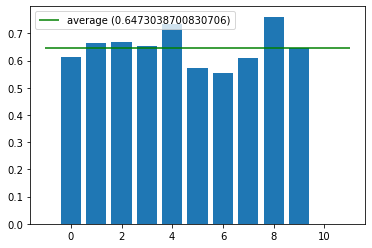

In [27]:
avg = sum(distrib)/len(distrib)

plt.bar(list(range(len(distrib))), distrib)
plt.hlines(avg, -1, len(distrib)+1, colors=['g'], label=f'average ({avg})')
plt.legend()
plt.show()

Safe to say that tags are frequently used and their exclusion might have a large impact on the POS tagging

### Changing Normalized Content

In [37]:
import spacy
from spacy import displacy
# spacy.require_gpu()

nlp = spacy.load('es_dep_news_trf', disable=conf['spacy']['pipe_disable'])

/home/ruskirin/miniconda3/envs/nlp/lib/python3.9/site-packages/spacy/util.py:1636: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [76]:
tag_amt = work_sample_v['text_orig'].apply(get_tag_amt)
has_tags = work_sample_v[tag_amt > 0]

rand_idx = np.random.choice(has_tags.shape[0], 100, replace=False)
rand_idx = np.sort(rand_idx)

tagged_sample = has_tags.iloc[rand_idx]
tagged_sample.head(3)

,verbs,text_orig,dependencies,has_ccomp,has_que,text_norm,lemma_pos_stopword,tweet_id
79,['esperar'],@tere_marinovic Esperemos que el sentido común...,Esperemos(nmod) que(mark) el(det) sentido(ROOT...,False,True,Esperemos que el sentido comun prime,Esperemos(esperar|VERB|False) que(que|SCONJ|Tr...,1.449899e+18
81,"['esperar', 'querer']",@CarlosChaviraR @ElProdigio182 @lopezobrador_ ...,O(cc) sea(fixed) que(mark) lo(obj) apoyas(ROOT...,True,True,O sea que lo apoyas para que tu empresa sea de...,O(o|CCONJ|False) sea(sea|NOUN|True) que(que|SC...,1.449871e+18
167,"['esperar', 'decir', 'responder']",@VTRChile @VTRsoporte q pasa con Uds???? No ha...,q(nsubj) pasa(ROOT) con(case) Uds(obl) ?() ?()...,True,True,q pasa con Uds???? No hay forma de comunicarme...,q(q|PRON|False) pasa(pasar|VERB|False) con(con...,1.453832e+18


In [77]:
docs = tagged_sample['text_orig'].apply(nlp)

#### CHANGE: 
Will be combining consecutive tags into one generic to prevent spacy interpreting each tag as different POS 

In [78]:
img = displacy.render(docs, style='dep', jupyter=False)

In [80]:
desc = 'combine-tags: (SVG, CSV) displacy\'s dependency trees for a random sample of tweets'

p_i = path_proj_dir/'saves'/'examples'/'combine-tags.svg'
p_d = path_proj_dir/'saves'/'examples'

# save_readme(path_proj_dir/'saves'/'examples', desc, append=True)
p_i.open('w', encoding='utf-8').write(img)
save_csv(tweets, 'combine-tags', p_d)

In [82]:
displacy.render(docs, style='dep')

#### Replacing Consecutive Tags w/ One

In [ ]:
pat_cons_tags = r''

### Adding Column w/ Link to Displacy Dependency Tree

In [74]:
pd.reset_option('display.max_colwidth')

In [37]:
work_sample_v.head(1)

,verbs,text_orig,dependencies,has_ccomp,has_que,text_norm,lemma_pos_stopword,tweet_id
0,"['sentir', 'mandar', 'pensar', 'ver']",Hoy amanecí con ganas de mandar todo a la chin...,Hoy(advmod) amaneci(ROOT) con(case) ganas(obl)...,True,True,Hoy amaneci con ganas de mandar todo a la chin...,Hoy(hoy|ADV|True) amaneci(amaneci|VERB|False) ...,1.451164e+18
